In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.fft import fft, rfft, irfft, fftfreq

In [2]:
df = pd.read_excel('45.xlsx')
df

,EventNo,Date,Time,U12,U23,U31,I1,I2,I3
0,16,2022-05-24,11:27:24.333,230,-12971,12741,-1.22,0.31,1.68
1,16,2022-05-24,11:27:24.333,639,-13176,12537,-1.22,0.31,1.68
2,16,2022-05-24,11:27:24.333,1035,-13367,12332,-1.37,0.31,1.68
3,16,2022-05-24,11:27:24.333,1419,-13559,12141,-1.37,0.46,1.68
4,16,2022-05-24,11:27:24.333,1789,-13725,11936,-1.53,0.46,1.83
...,...,...,...,...,...,...,...,...,...
2494,16,2022-05-24,11:27:24.532,-1764,-11859,13623,-1.07,0.31,1.37
2495,16,2022-05-24,11:27:24.532,-1393,-12077,13470,-1.07,0.31,1.37
2496,16,2022-05-24,11:27:24.532,-1010,-12307,13316,-1.07,0.31,1.53
2497,16,2022-05-24,11:27:24.532,-601,-12524,13125,-1.07,0.31,1.53


<AxesSubplot:xlabel='Time', ylabel='I1'>

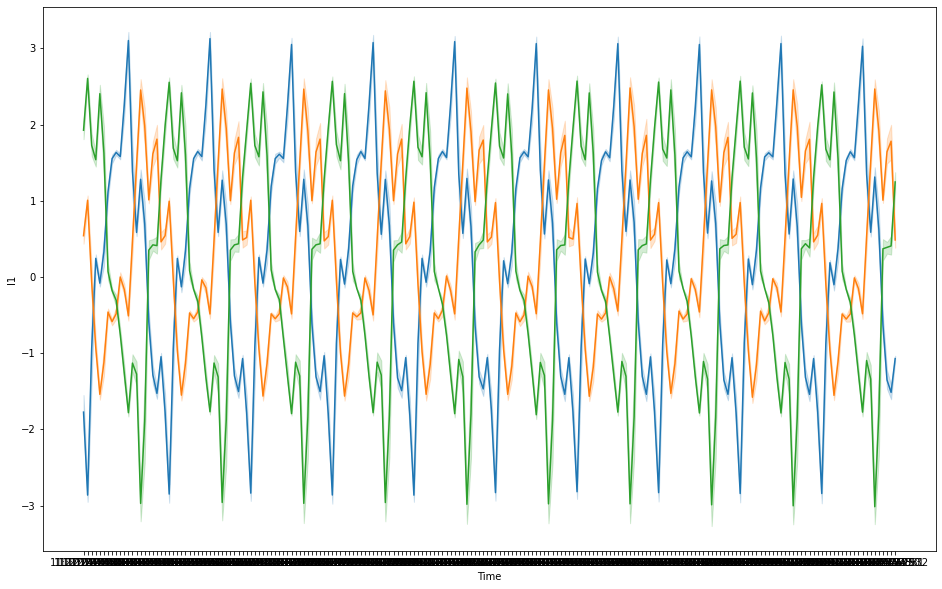

In [9]:
plt.figure(figsize=(16, 10))
sns.lineplot(x = 'Time', y = 'I1', data=df)
sns.lineplot(x = 'Time', y = 'I2', data=df)
sns.lineplot(x = 'Time', y = 'I3', data=df)

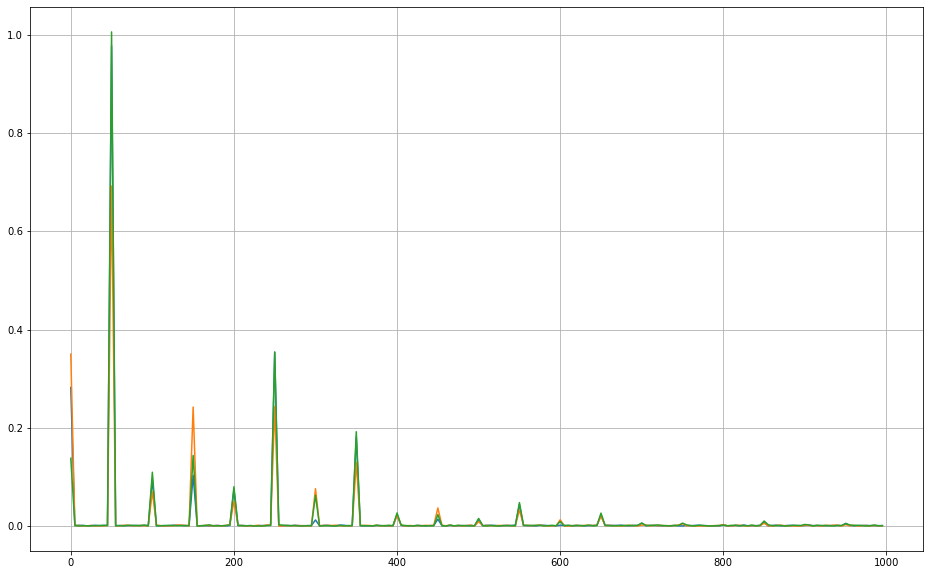

In [10]:
# Количество точек датафрейма
N = 2499
# Частота дискретизации
T = 1.0 / 12500
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.array(df.I1)
yf = fft(y)
y1 = np.array(df.I2)
yf1 = fft(y1)
y2 = np.array(df.I3)
yf2 = fft(y2)
xf = fftfreq(N, T)[:N//2]
plt.figure(figsize=(16, 10))
#plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.plot(xf[0:200], (1.0/N * np.abs(yf[0:N//2]))[0:200])
plt.plot(xf[0:200], (1.0/N * np.abs(yf1[0:N//2]))[0:200])
plt.plot(xf[0:200], (1.0/N * np.abs(yf2[0:N//2]))[0:200])
#plt.plot((2.0/N * np.abs(yf[0:N//2]))[0:200])
plt.grid()
plt.show()